# **Part I: Research Question**

## A. Purpose of Data Analysis

### 1. Research Question Relevance

How do various patient demographics and medical factors (like age, gender, BMI, etc.) affect the total medical charges incurred by the patient?

This question seeks to understand the determinants of medical costs, which is of great significance to healthcare providers, insurance companies, and patients.


### 2. Goals of Data Analysis

- To identify the significant predictors of medical charges.
- To quantify the relationship between these predictors and medical charges.
- To develop a predictive model that can be used to forecast medical charges based on specific patient demographics and attributes.


---



# Part II: Method Justification


## B. Multiple Linear Regression Methods

### 1. Assumptions of Multiple Linear Regression

- Linearity: The relationship between the dependent and independent variables is linear.
- Independence: Observations are independent of each other.
- Homoscedasticity: The variance of the residuals (errors) is constant across all levels of the independent variables.
-
Normality of Residuals: The residuals (or errors) of the model are normally distributed.


### 2. Benefits of Python or R

**Extensive Libraries and Tools:**

Python boasts a diverse ecosystem of libraries and tools designed for data analysis. For multiple linear regression, libraries such as statsmodels and scikit-learn provide comprehensive methods to build, diagnose, and interpret regression models. This means that I can use these libraries to quickly perform complex tasks without having to code algorithms from scratch.

Statsmodels offers detailed summary statistics of regression models, allowing for in-depth analysis and interpretation of model coefficients, p-values, confidence intervals, and other diagnostic metrics.

**Visualization Capabilities:**

Visualization is a important part of data analysis, especially when diagnosing and interpreting regression models. Python offers libraries like matplotlib and seaborn that excel in creating a wide range of visualizations. These libraries can create everything from basic scatter plots to more intricate residual plots and heatmaps. Such visualizations can help in checking assumptions of linearity, homoscedasticity, and normality of residuals, which are important in multiple linear regression analysis.


### 3. Suitability of Multiple Linear Regression

My research question aims to understand the relationship between a continuous dependent variable (medical charges) and multiple independent variables (patient demographics and medical attributes). Multiple linear regression is designed to handle such scenarios where we want to predict a continuous outcome variable based on multiple predictors.


---

# **Part III: Data Preparation**

## C. Data Preparation Process



### 1. Data Cleaning Goals and Steps
 **Goals:**

**Identify and Handle Missing Values**: Ensure that the dataset does not have
any gaps or missing data that could compromise the analysis.

**Check for Duplicates**: Ensure there's no redundancy in the data. Remove any duplicate rows if found.

**Ensure Appropriate Data Types**: Confirm that each column's data type aligns with the nature of the data it contains.

**Remove Irrelevant Columns**: Eliminate columns that don't contribute value to the research question to make the dataset and subsequent analysis more focused.


In [ ]:
#Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

#### Load data


In [ ]:
#Load dataset into pandas dataframe
#Reloading dataframe at this point to make the cleaning process easier to roll back without having to rerun any previous analysis
medical_data = pd.read_csv('/content/medical_clean.csv')

In [ ]:
#Visually inspecting the first 10 rows
medical_data.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
5,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.691180,12742.589910,4,5,4,4,3,5,4,6
6,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.627161,16815.513600,4,3,3,2,3,4,5,5
7,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.499039,6930.572138,1,2,2,5,4,2,4,2
8,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.402860,8363.187290,3,3,2,3,3,3,4,2
9,10,Z229385,5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27,687e7ba1b80022c310fa2d4b00db199a,Paynesville,MN,Stearns,56362,45.40325,-94.71424,5840,Urban,America/Chicago,"Production assistant, radio",2,78,38965.22,Never Married,Female,No,18.224324,7,1,2,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,Yes,Yes,Yes,Blood Work,1.632554,3147.855813,2622

#### Data Cleaning Steps

In [ ]:
# 1. Check for missing values
missing_values = medical_data.isnull().sum()
missing_values

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [ ]:
# 2. Check for duplicates
duplicate_rows = medical_data.duplicated().sum()
duplicate_rows

0

In [ ]:
# 3. Check data types of columns
data_types = medical_data.dtypes
data_types

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

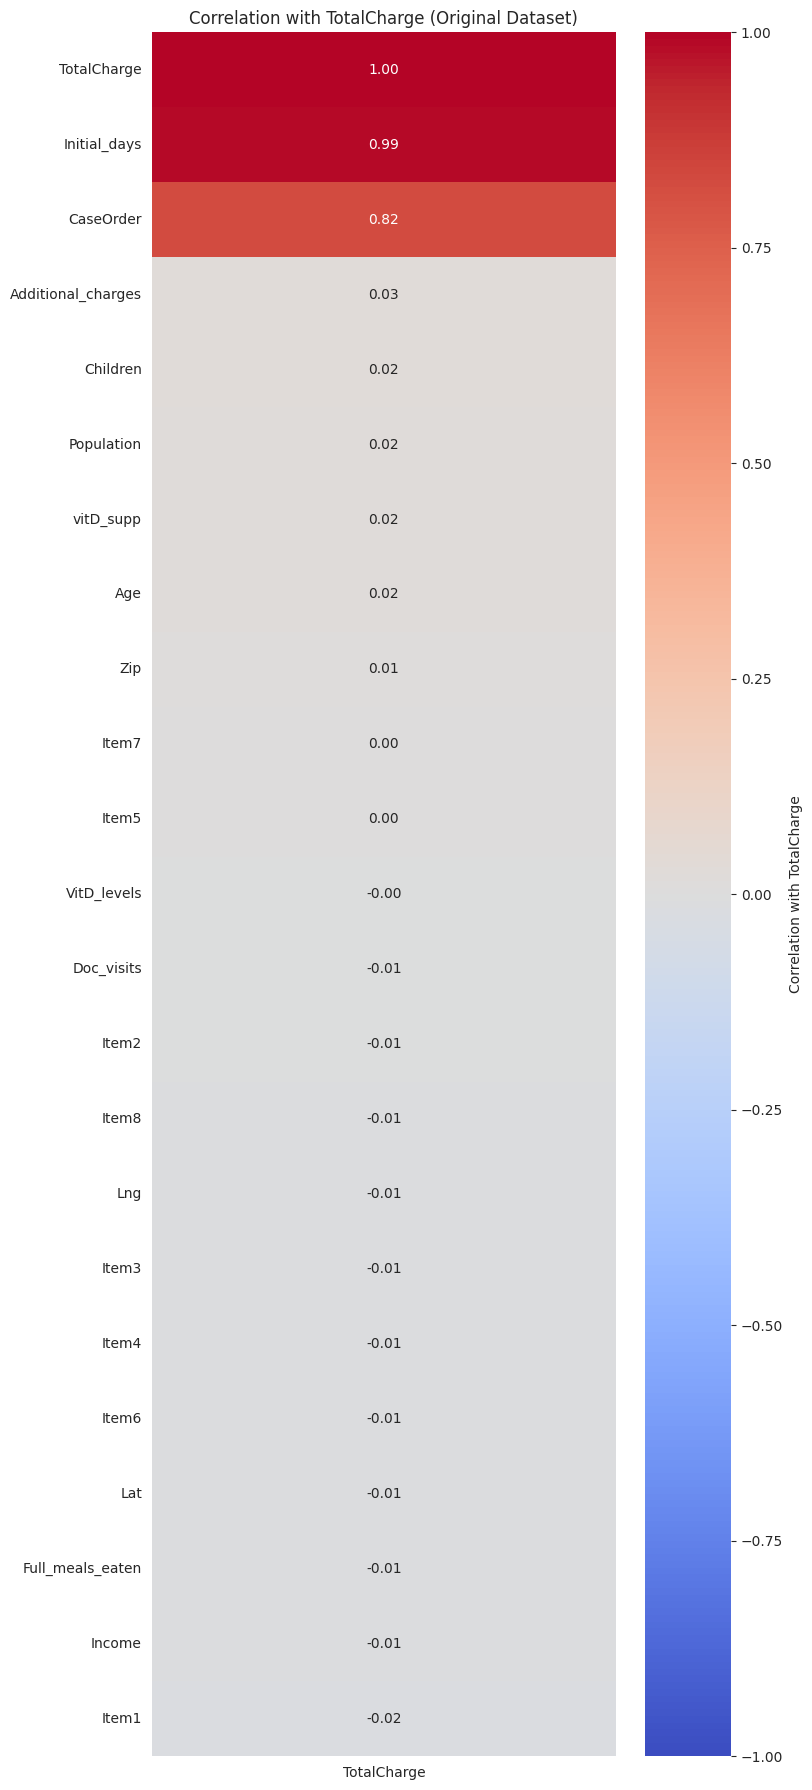

In [ ]:
# Compute the correlation matrix for the original dataset
correlation_matrix_original = medical_data.corr(numeric_only=True)

# Extract correlations of all features with 'TotalCharge' from the original dataset
total_charge_correlations_original = correlation_matrix_original['TotalCharge'].sort_values(ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(8, 18))

# Generate a focused heatmap for the original dataset
sns.heatmap(total_charge_correlations_original.to_frame(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", cbar_kws={'label': 'Correlation with TotalCharge'})

# Adjust layout for better visualization
plt.title("Correlation with TotalCharge (Original Dataset)")
plt.tight_layout()
plt.show()



- There are no missing values in the dataset.
- There are no duplicate rows in the dataset.
- The data types seem appropriate for each column, with a mix of numerical (int64 and float64) and categorical (object) data types.<P>

- TotalCharge has a very strong positive correlation with **Intial_days** and **CaseOrder**.<br>

There are a few columns that are not relevant to the research question so they will need to be dropped. These include **CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, TimeZone**, and **Job**

I also will remove **Additional_charges** since this information is already included inside **TotalCharge** so it is already known there will be a relationship between higher additional charges and the total charge.

I'm also choosing to drop the **Intial_days** column because based on prior healthcare knowledge I'm making the assumption that the total hospital bill is calculated including a per day charge along with other additional charges so it would be logical to assume that as a patient's stay increases so does their total hospital bill.

Also because **Initial_days** is also has a strong positive correlation to **TotalCharge** at 0.99 it is best to drop this column to avoid multicollinearity.

**Item1,	Item2,	Item3, Item4,	Item5,	Item6,	Item7** and	**Item8** will also be removed because they are not needed. These are survey items that related to patient satisfaction and logically do not have the ability to affect total charges. While there might be some correlation between patient satisfaction scores and total charges these survey scores do not have the ability to affect the amount a patient is charged.



In [ ]:
# Dropping irrelevant columns
columns_to_drop = ['Initial_days','CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County',
                   'Zip', 'Lat', 'Lng', 'TimeZone', 'Job','Additional_charges','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']

medical_data_cleaned = medical_data.drop(columns=columns_to_drop)


In [ ]:

# Display the first few rows of the cleaned dataset
medical_data_cleaned.head()

,Population,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge
0,2951,Suburban,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,3726.702860
1,11303,Urban,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,4193.190458
2,17125,Suburban,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,2434.234222
3,2162,Suburban,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,2127.830423
4,5287,Rural,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,2113.073274


### 2. Variables' Summary Statistics
- Present a detailed summary of the dependent and independent variables. Include a snapshot of the output.

In [ ]:
summary_statistics = medical_data_cleaned.describe(include='all')
summary_statistics

,Population,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,TotalCharge
count,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000
unique,NaN,3,NaN,NaN,NaN,5,3,2,NaN,NaN,NaN,NaN,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4,NaN
top,NaN,Rural,NaN,NaN,NaN,Widowed,Female,No,NaN,NaN,NaN,NaN,No,Emergency Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Blood Work,NaN
freq,NaN,3369,NaN,NaN,NaN,2045,5018,6331,NaN,NaN,NaN,NaN,7425,5060,5910,8007,4517,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265,NaN
mean,9965.253800,NaN,2.097200,53.511700,40490.495160,NaN,NaN,NaN,17.964262,5.012200,1.001400,0.398900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.172769
std,14824.758614,NaN,2.163659,20.638538,28521.153293,NaN,NaN,NaN,2.017231,1.045734,1.008117,0.628505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2180.393838
min,0.000000,NaN,0.000000,18.000000,154.080000,NaN,NaN,NaN,9.806483,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938.312067
25%,694.750000,NaN,0.000000,36.000000,19598.775000,NaN,NaN,NaN,16.626439,4.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3179.374015
50%,2769.000000,NaN,1.000000,53.000000,33768.420000,NaN,NaN,NaN,17.951122,5.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5213.952000
75%,13945.000000,NaN,3.000000,71.000000,54296.402500,NaN,NaN,NaN,19.347963,6.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7459.699750


### **Summary Statistics**

**Quantitative Columns:**

| Column      | Details                                                                                   |
|-------------|-------------------------------------------------------------------------------------------|
| Population  | Ranges from 0 to 122,814 with an average of approximately 9,965.                          |
| Children    | Ranges from 0 to 10 with an average of approximately 2.1.                                 |
| Age         | Ranges from 18 to 89 years with an average age of approximately 53.5 years.               |
| Income      | Ranges from \$154.08 to \$207,249.10 with an average income of approximately $40,490.50.    |
| VitD_levels | Ranges from 9.81 to 26.39 with an average of approximately 17.96.                         |
| Doc_visits  | Ranges from 1 to 9 with an average of 5 visits.                                          |
| TotalCharge | Ranges from \$1,938.31 to \$9,180.73 with an average charge of approximately \$5,312.17.     |

**Categorical Columns:**

| Column      | Details                                                                                   |
|-------------|-------------------------------------------------------------------------------------------|
| Area        | Three unique values (Suburban, Urban, Rural), with Rural being the most frequent.         |
| Marital     | Five unique statuses, with Widowed being the most frequent.                               |
| Gender      | Three unique values, with Female being the most frequent.                                 |
| ReAdmis     | Two unique values (Yes, No), with No being the most frequent.                             |
| Arthritis   | Two unique values (Yes, No).                                                             |
| Diabetes    | Two unique values (Yes, No).                                                             |
| Hyperlipidemia | Two unique values (Yes, No).                                                          |
| BackPain    | Two unique values (Yes, No).                                                             |
| Anxiety     | Two unique values (Yes, No).                                                             |
| Allergic_rhinitis | Two unique values (Yes, No).                                                        |
| Reflux_esophagitis | Two unique values (Yes, No).                                                       |
| Asthma      | Two unique values (Yes, No).                                                             |
| Services    | Four unique services, with Blood Work being the most frequent.                            |


### 3. Data Visualizations
- Showcase univariate and bivariate visualizations for the dependent and independent variables.

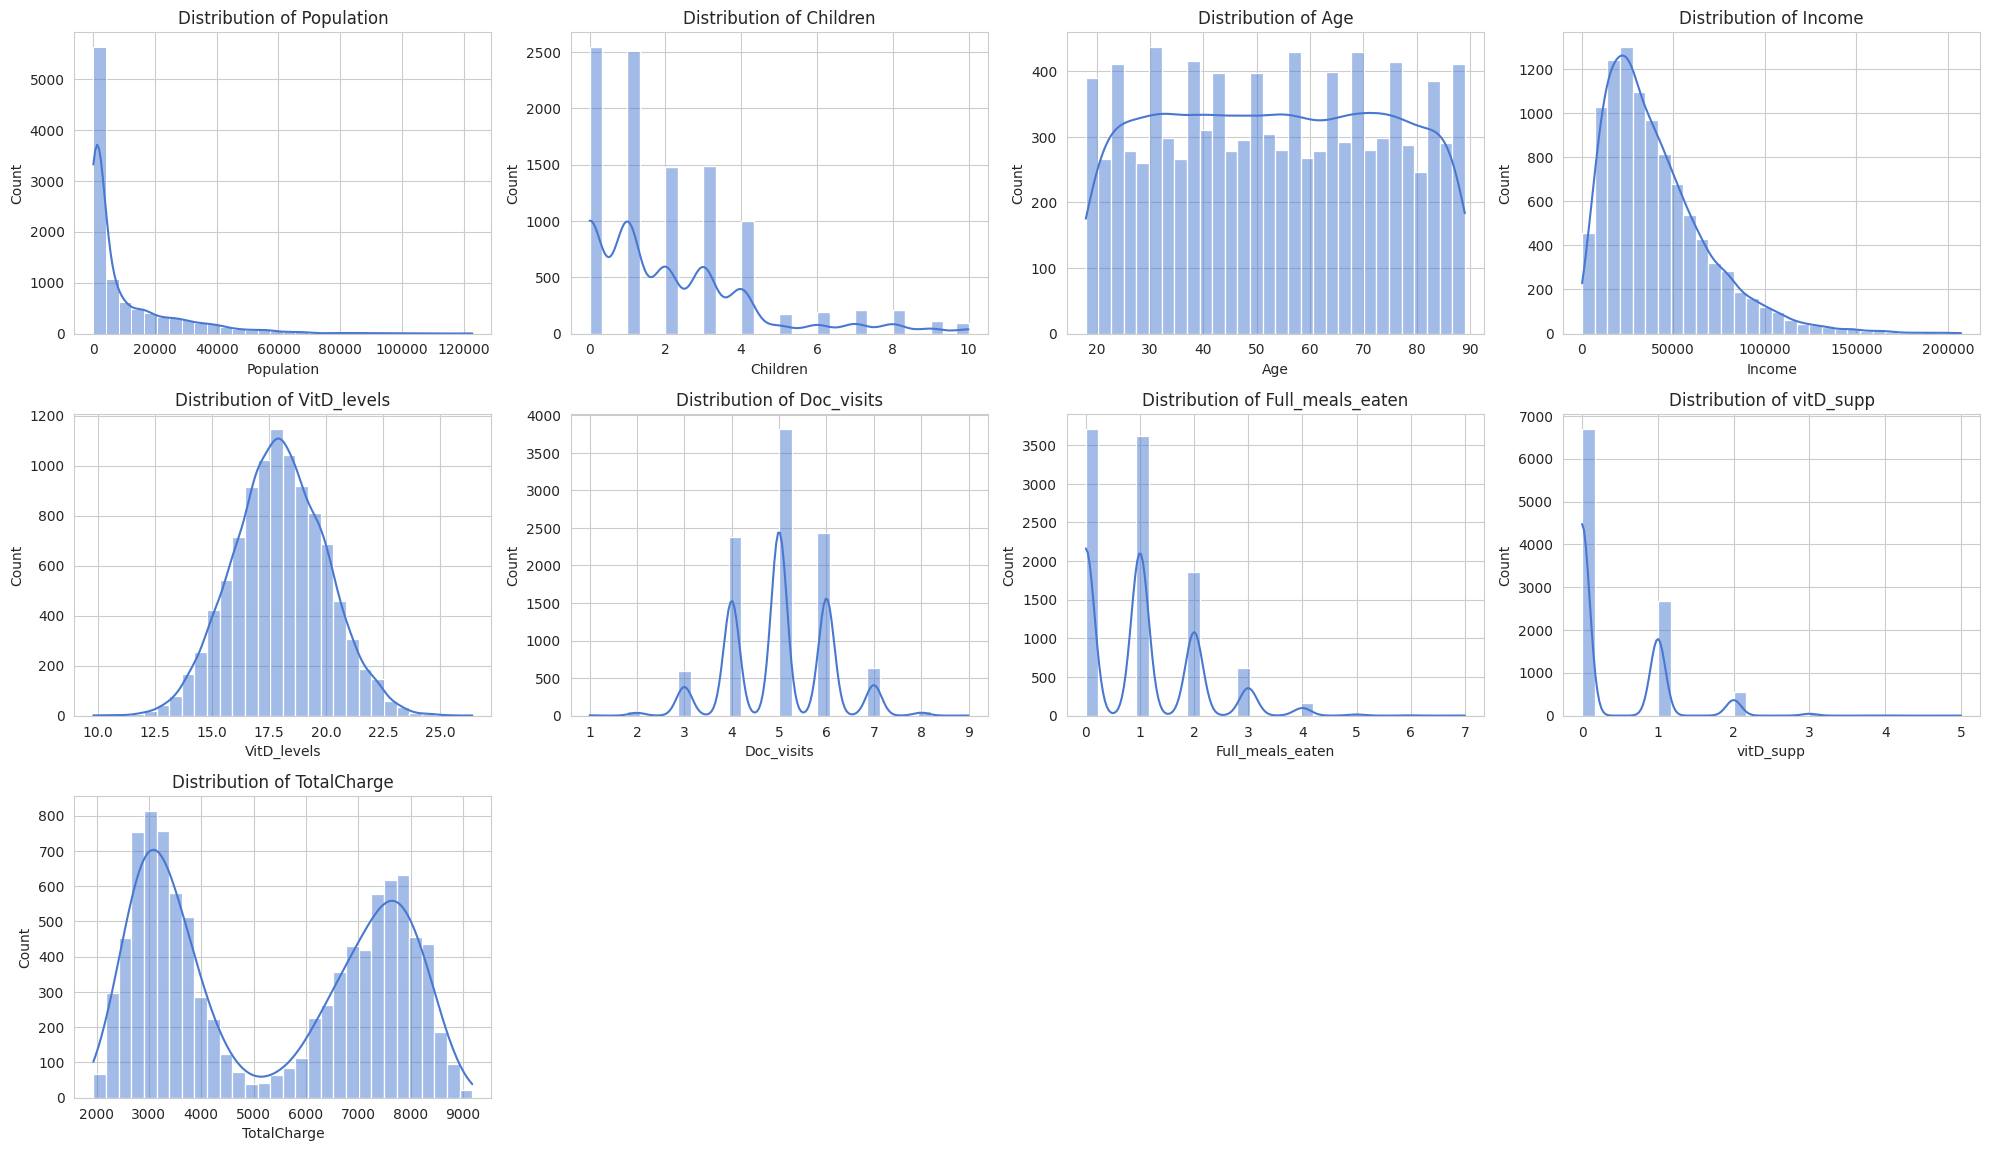

In [ ]:
# List of numerical variables
numerical_variables = medical_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plotting histograms for each numerical variable
for i, var in enumerate(numerical_variables, 1):
    plt.subplot(4, 4, i)
    sns.histplot(medical_data_cleaned[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plt.show()

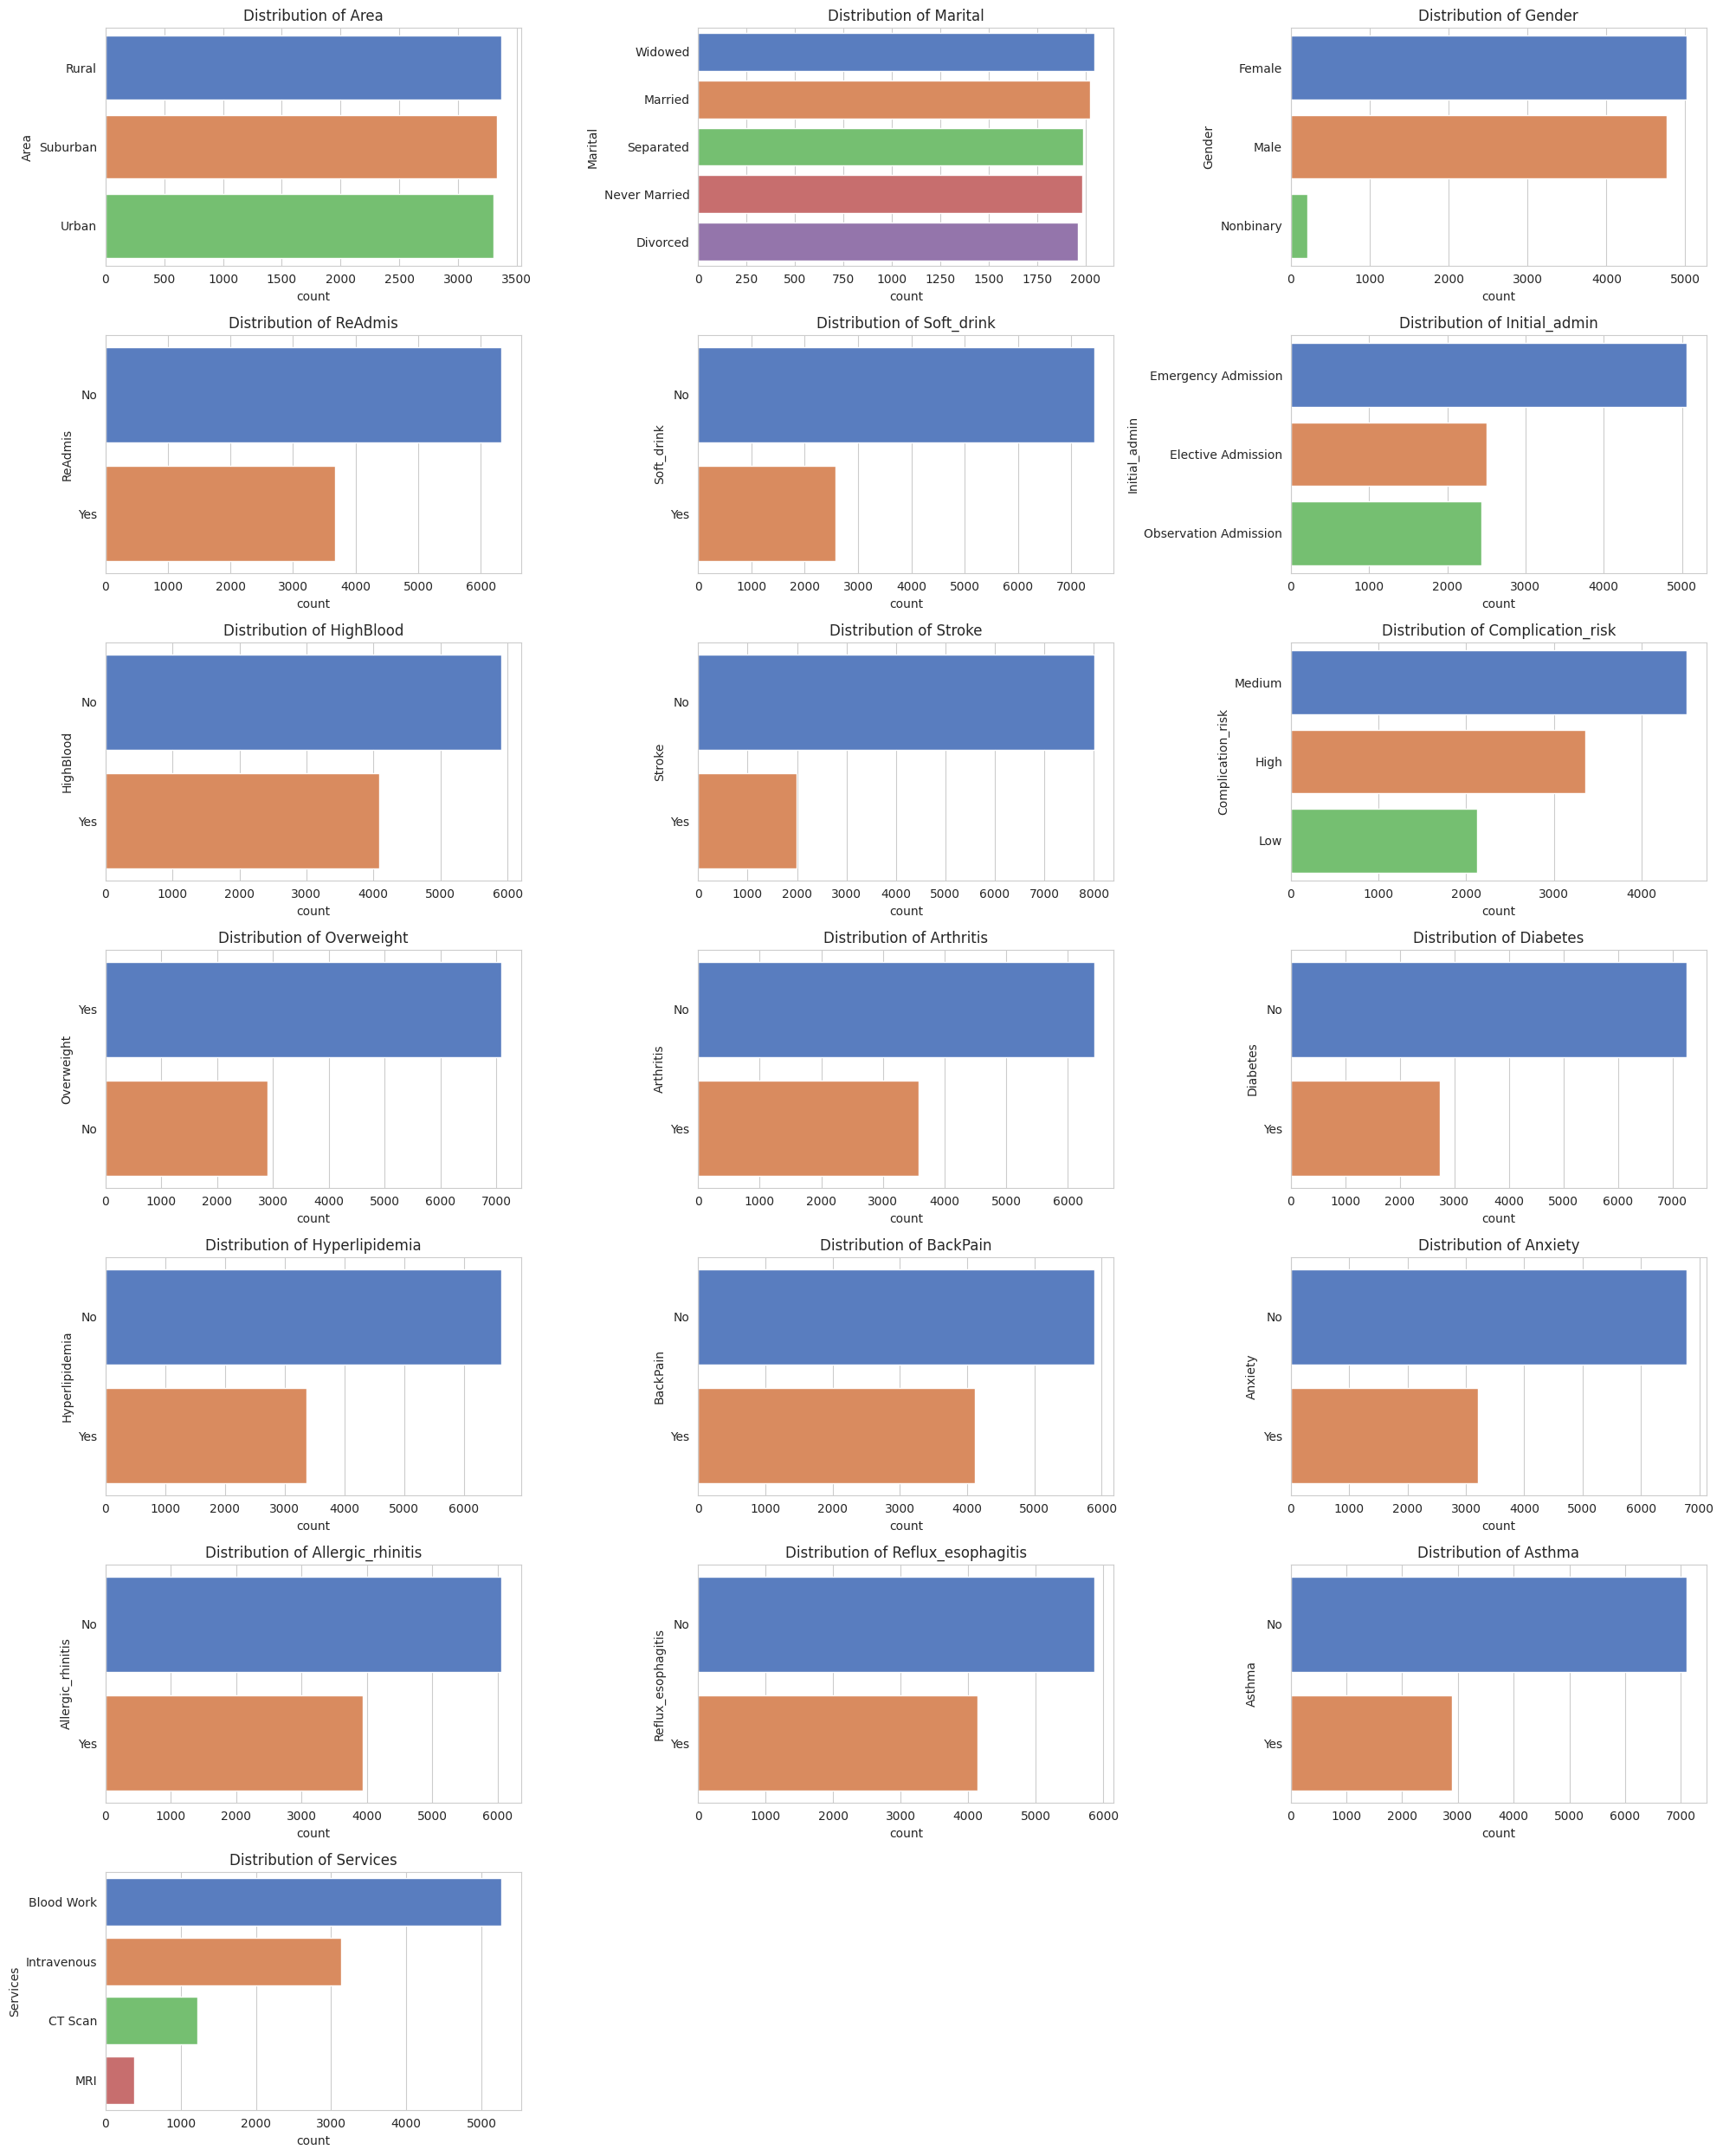

In [ ]:
# List of categorical variables
categorical_variables = medical_data_cleaned.select_dtypes(include=['object']).columns

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Create a figure to accommodate all categorical variables
plt.figure(figsize=(20, 25))

# Plotting bar plots for each categorical variable
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(7, 3, i)
    sns.countplot(y=medical_data_cleaned[var], order=medical_data_cleaned[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plt.show()

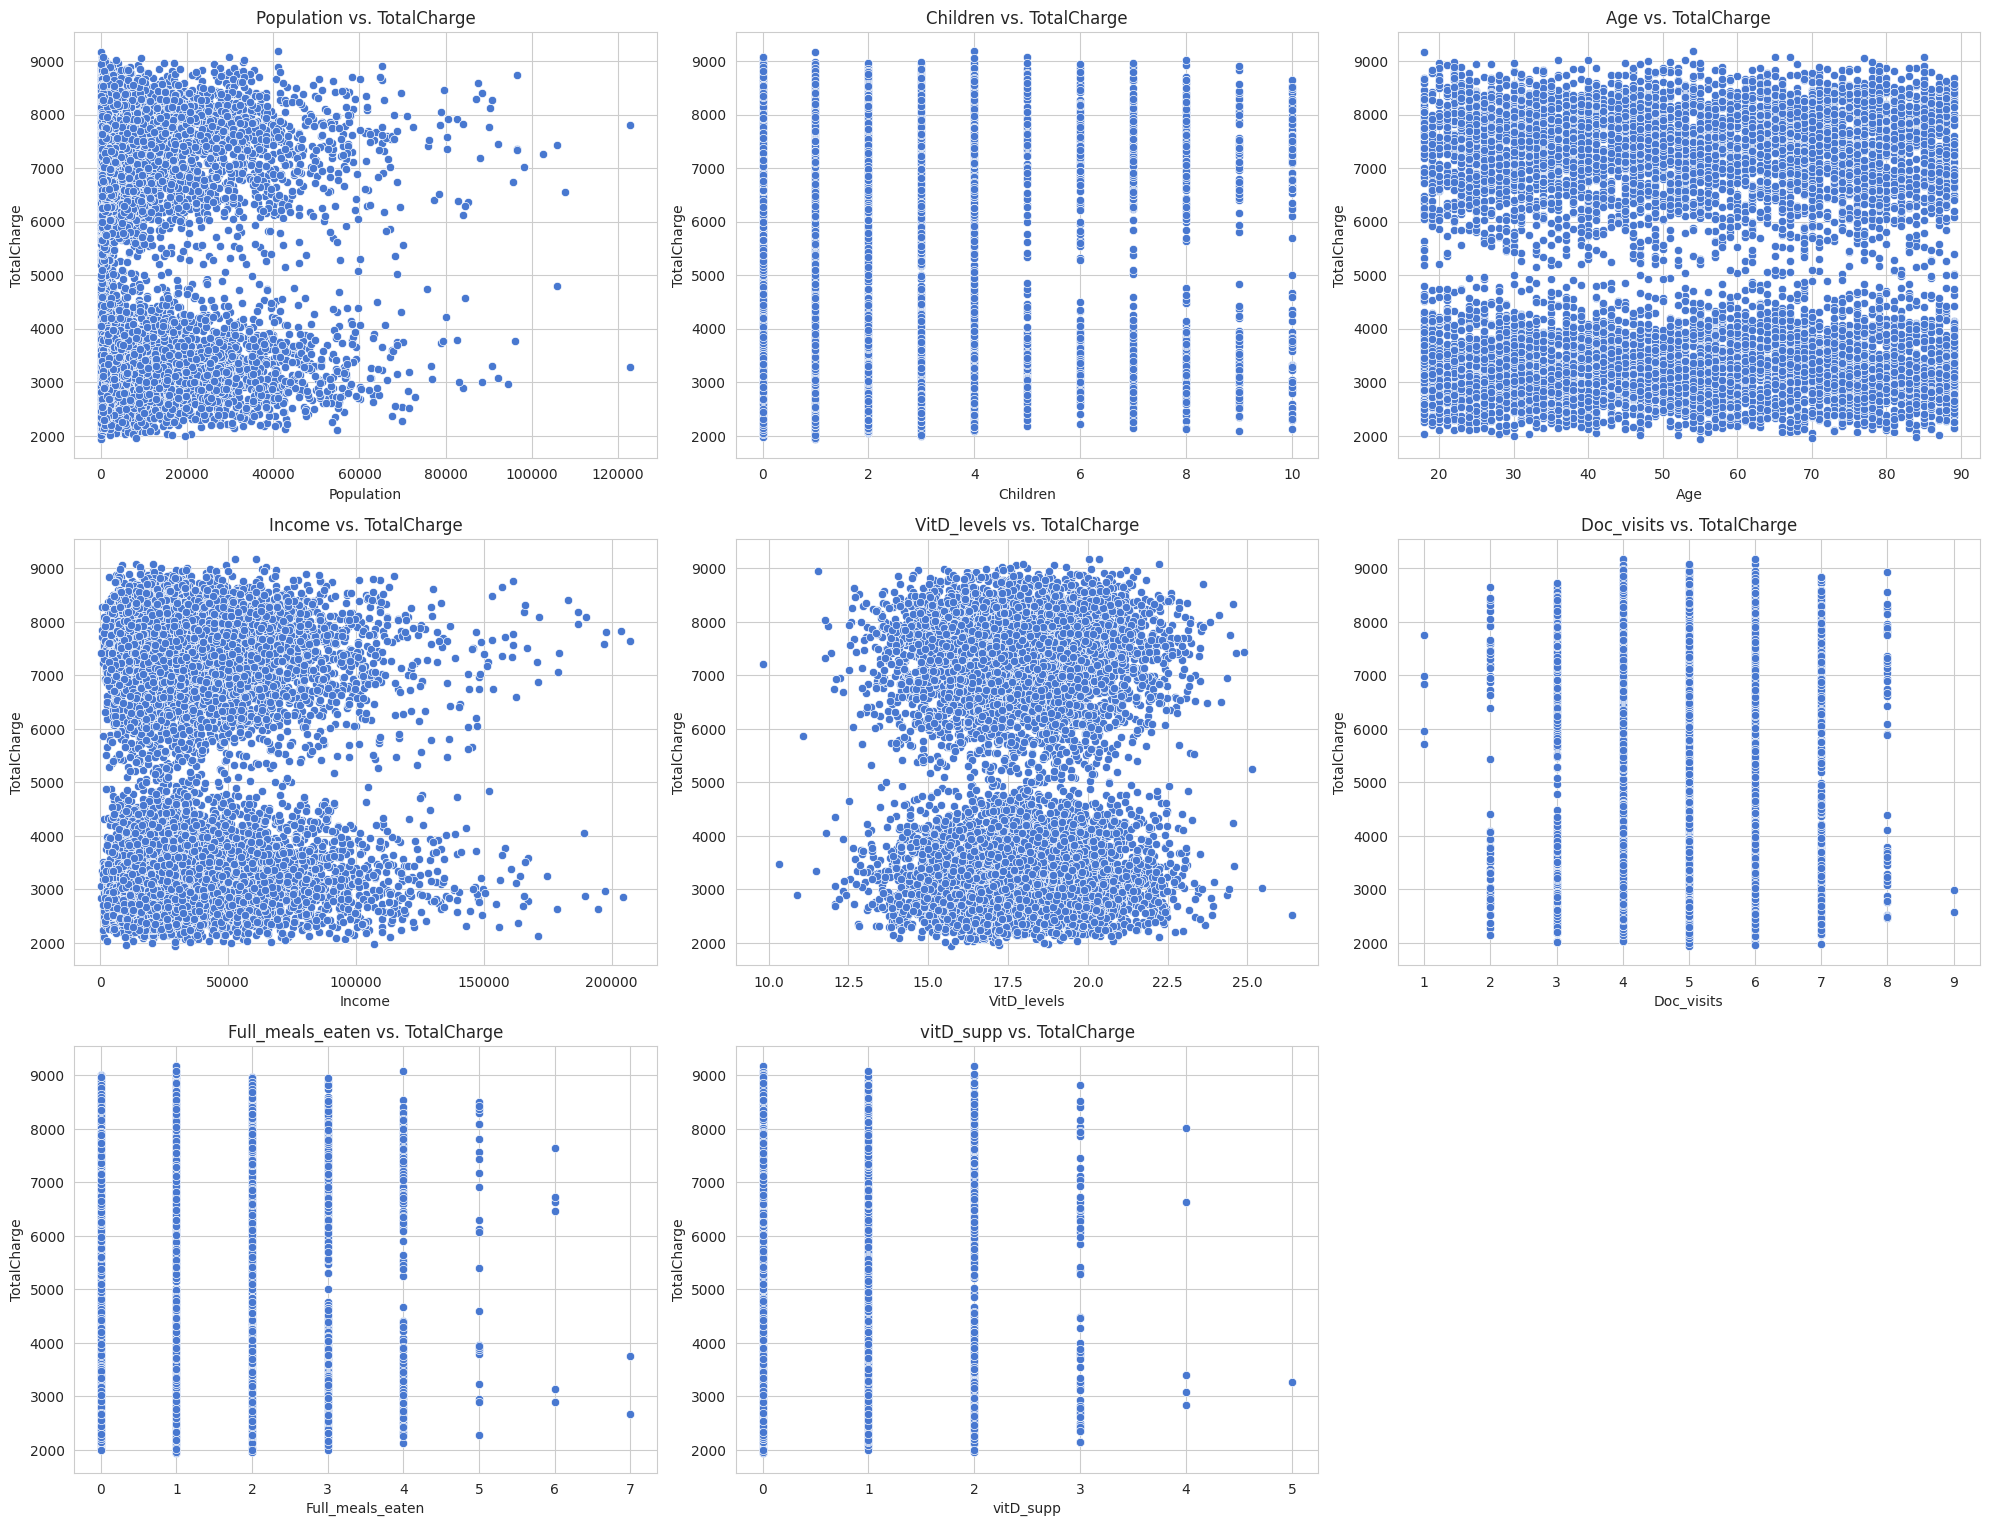

In [ ]:
# List of numerical independent variables (excluding the dependent variable 'TotalCharge')
numerical_independent_vars = medical_data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns='TotalCharge').columns

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("muted")

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Plotting scatter plots for each numerical independent variable vs. TotalCharge
for i, var in enumerate(numerical_independent_vars, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=medical_data_cleaned[var], y=medical_data_cleaned['TotalCharge'])
    plt.title(f'{var} vs. TotalCharge')
    plt.tight_layout()

plt.show()



### 4. Data Transformation Goals and Steps

**Data Transformation Goals**:

1. **Ensure Data Completeness and Quality**: Ensure that the dataset is free from missing values and duplicates which can skew the analysis.
2. **Feature Selection for Relevance**: Exclude variables that do not provide meaningful information in predicting medical charges.
3. **Convert Categorical Variables**: Transform categorical variables into a format suitable for regression modeling.
4. **Standardize Numerical Variables**: Ensure that numerical variables are on a comparable scale, making coefficients in the regression model interpretable.

**Steps Taken**:

1. **Data Cleaning**:
   - Checked and confirmed that there were no missing values in the dataset.
   - Checked for duplicate rows and found none.
   - Examined the data types of each column to ensure they align with their expected types.
   - Dropped irrelevant columns that were not pertinent to the research question, such as identifiers (`CaseOrder`, `Customer_id`, etc.), geographic details (`City`, `State`, etc.), and other columns like `Additional_charges` and survey items (`Item1` to `Item8`).

2. **Encoding Categorical Variables**:
   - Identified categorical variables in the dataset, including `Gender`, `MaritalStatus`, and others.
   - Used one-hot encoding to transform these categorical variables into binary columns, where each category is represented by a separate column.

3. **Scaling Numerical Variables**:
   - Identified numerical independent variables such as `Age`, `Income`, and `VitD_levels`.
   - Used Standard Scaling to transform these numerical variables, resulting in values with a mean of 0 and a standard deviation of 1. This ensures that all variables are on a comparable scale, which is crucial for interpreting the coefficients in a regression model.


**Note** The code for data cleaning was provided in a previous step

In [ ]:
# One-hot encoding the categorical variables
medical_data_encoded = pd.get_dummies(medical_data_cleaned, drop_first=True)  # drop_first=True to avoid the dummy variable trap

# Display the first few rows of the encoded dataset
medical_data_encoded.head()


,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,TotalCharge,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,ReAdmis_Yes,Soft_drink_Yes,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_Yes,Stroke_Yes,Complication_risk_Low,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,2951,1,53,86575.93,19.141466,6,0,0,3726.702860,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,0
1,11303,3,51,46805.99,18.940352,4,2,1,4193.190458,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,17125,3,53,14370.14,18.057507,4,1,0,2434.234222,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
3,2162,0,78,39741.49,16.576858,4,1,0,2127.830423,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
4,5287,1,22,1209.56,17.439069,5,0,2,2113.073274,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
# Initialize the standard scaler
scaler = StandardScaler()

# Scaling the numerical variables
medical_data_encoded[numerical_independent_vars] = scaler.fit_transform(medical_data_encoded[numerical_independent_vars])

# Display the first few rows of the scaled dataset
medical_data_encoded.head()


,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,TotalCharge,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,ReAdmis_Yes,Soft_drink_Yes,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_Yes,Stroke_Yes,Complication_risk_Low,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,3726.702860,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,1,0,1,0,0,0
1,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,4193.190458,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,2434.234222,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
3,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,2127.830423,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
4,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,2113.073274,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


### 5. Prepared Data Set
- Supply the cleaned and prepared dataset in CSV format.

In [ ]:
# Save the DataFrame as a CSV file
medical_data_encoded.to_csv('medical_data_encoded.csv', index=False)



---


# Part IV: Model Comparison and Analysis

## D. Linear Regression Model Comparison

### 1. Initial Multiple Linear Regression Model
- Construct the initial model using all identified independent variables from Part C2.

In [ ]:
# Define independent variables (X) and the dependent variable (y)
X = medical_data_encoded.drop('TotalCharge', axis=1)
y = medical_data_encoded['TotalCharge']

# Adding a constant to the independent variables (required for the statsmodels regression model)
X_with_const = sm.add_constant(X)

# Constructing the initial multiple linear regression model using statsmodels (provides detailed statistics)
initial_ols_model = sm.OLS(y, X_with_const).fit()

# Displaying the summary of the regression model
print(initial_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     757.2
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:52:49   Log-Likelihood:                -84471.
No. Observations:               10000   AIC:                         1.690e+05
Df Residuals:                    9963   BIC:                         1.693e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### 2. Feature Selection or Model Evaluation Justification

I will apply the backward elimination techique to refine my regression model

Backward elimination is a stepwise regression technique used to refine regression models. It begins with a model that includes all potential independent variables. In each step of the process, the variable with the least statistical significance (highest p-value) is removed, and the model is refitted. This process continues iteratively until all variables left in the model are statistically significant based on a pre-defined significance level (typically \( p < 0.05 \)).

**Why Use Backward Elimination?**
   - **Simplicity**: By eliminating insignificant predictors, we achieve a simpler, more interpretable model.
   - **Improved Accuracy**: Removing irrelevant predictors can lead to a reduction in overfitting, potentially improving the model's predictive accuracy on new, unseen data.
   - **Efficiency**: A model with fewer variables requires less data and is computationally more efficient.

3. **Justification in the Context of the Research Question**:
   - **Relevance to the Research Goal**: The research question aims to understand the factors that affect total medical bill charges. By using backward elimination, we ensure that only the most relevant variables are retained in the model, making the findings more aligned with the research objective.
   - **Dealing with Multicollinearity**: The backward elimination process can help mitigate the effects of multicollinearity. By removing variables that don't significantly contribute to the predictive power of the model, we reduce the risk of retaining redundant or highly correlated variables.
   - **Ensuring Robustness**: The iterative nature of backward elimination, where the model is refitted after each variable removal, ensures that decisions on variable exclusions are based on the most current model fit, leading to a more robust final model.

In [ ]:
# Significance level to stay in the model
SL_STAY = 0.05

# Define independent variables (X) and the dependent variable (y)
X = medical_data_encoded.drop('TotalCharge', axis=1)
y = medical_data_encoded['TotalCharge']

# Adding a constant to the independent variables (required for the statsmodels regression model)
X_with_const = sm.add_constant(X)

# Step 1: Fit the model with all features
model = sm.OLS(y, X_with_const).fit()

# Extracting p-values of all features
p_values = model.pvalues.drop('const')

# Step 2: Identify the feature with the highest p-value
max_p_value_feature = p_values.idxmax()
max_p_value = p_values.max()

while max_p_value > SL_STAY:
    # Step 3: Remove the feature with the highest p-value
    X_with_const = X_with_const.drop(max_p_value_feature, axis=1)

    # Step 4: Refit the model with the reduced set of features
    model = sm.OLS(y, X_with_const).fit()

    # Re-extracting p-values of all features (excluding the constant)
    p_values = model.pvalues.drop('const')

    # Re-identify the feature with the highest p-value
    max_p_value_feature = p_values.idxmax()
    max_p_value = p_values.max()
reduced_model = model

### 3. Reduced Linear Regression Model
- Present a concise linear regression model following the procedure from Part D2. Include a snapshot of the model's output.

In [ ]:
# Displaying the summary of the reduced regression model
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2098.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:53:09   Log-Likelihood:                -84479.
No. Observations:               10000   AIC:                         1.690e+05
Df Residuals:                    9986   BIC:                         1.691e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## E. Reduced Linear Regression Model Analysis

### 1. Data Analysis Process

### Initial Model:
- **Number of Features:** The initial model contained most of the independent variables present in the dataset, which was quite a large number.
- **\( R^2 \) Value:** The \( R^2 \) value for the initial model was approximately 0.732. This means that about 73.2% of the variability in `TotalCharge` can be explained by the features in the initial model.
- **Complexity:** The initial model is more complex due to the number of variables it includes. This can sometimes lead to overfitting where the model might perform well on the current dataset but may not generalize well to new, unseen data.

### Reduced Model (after backward elimination):
- **Number of Features:** The reduced model contained fewer features than the initial model, as several non-significant predictors were eliminated.
- **\( R^2 \) Value:** The \( R^2 \) value for the reduced model was also close to 0.732. This is quite impressive since it suggests that even after removing several variables, our model's explanatory power didn't diminish. It retained almost the same capacity to explain the variability in `TotalCharge`.
- **Complexity:** The reduced model is less complex. Fewer variables mean it's more interpretable, easier to understand, and potentially more generalizable to new data.

### Conclusion:
Both models have a similar \( R^2 \) value, but the reduced model achieves this with fewer predictors. This makes the reduced model more parsimonious – it doesn't sacrifice much explanatory power while being simpler. In the context of regression analysis, a simpler model is often preferable as it's less likely to overfit and is easier to interpret.

Based on the \( R^2 \) metric and considering the principle of parsimony, the reduced model is just as effective as the initial model but with the advantage of being simpler and more interpretable.

### 2. Analysis Output and Calculations
Provide the output and all calculations of the analysis you performed, including the following elements for your reduced linear regression model:

- a residual plot

- the model’s residual standard error

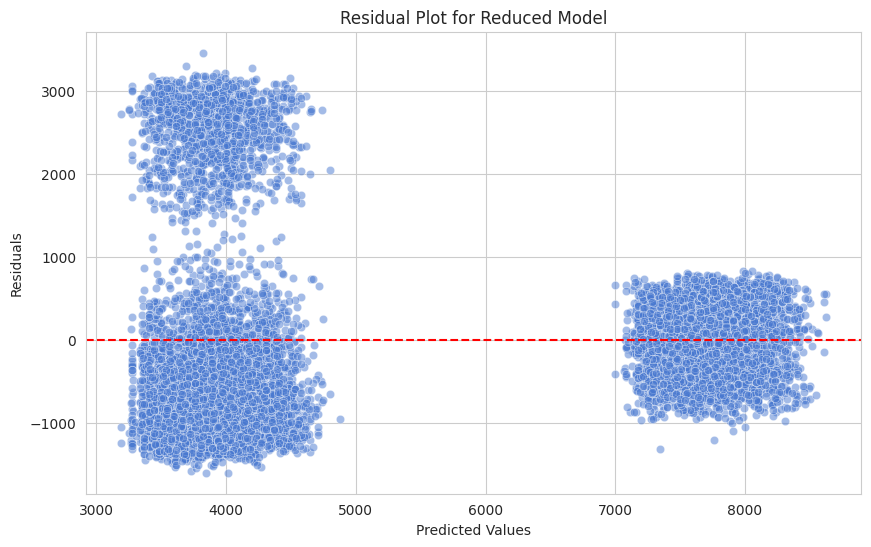

In [ ]:
# Plotting the residuals
predicted_values = reduced_model.predict(X_with_const)
residuals = y - predicted_values
plt.figure(figsize=(10,6))
sns.scatterplot(x=predicted_values, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Reduced Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



In [ ]:
RSE = np.sqrt(sum(residuals**2) / (len(residuals) - 2))
RSE


1128.920902092665

### 3. Code for Linear Regression Models
Provide an executable error-free copy of the code used to support the implementation of the linear regression models using a Python or R file.

In [ ]:
# Consolidating the code for the steps into a single Python script

code_content = """
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Data Cleaning and Preparation
data_path = "/path_to_your_data/medical_clean.csv"
medical_data = pd.read_csv(data_path)
columns_to_drop = ['Initial_days','CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County',
                   'Zip', 'Lat', 'Lng', 'TimeZone', 'Job','Additional_charges','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']
medical_data_cleaned = medical_data.drop(columns=columns_to_drop)

# 2. One-hot encoding of categorical variables
medical_data_encoded = pd.get_dummies(medical_data_cleaned, drop_first=True)

# 3. Scaling of numerical variables
numerical_independent_vars = ['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp']
scaler = StandardScaler()
medical_data_encoded[numerical_independent_vars] = scaler.fit_transform(medical_data_encoded[numerical_independent_vars])

# 4. Initial Multiple Linear Regression Model Construction
X = medical_data_encoded.drop('TotalCharge', axis=1)
y = medical_data_encoded['TotalCharge']
X_with_const = sm.add_constant(X)
initial_model = sm.OLS(y, X_with_const).fit()

# 5. Model Refinement using Backward Elimination
SL_STAY = 0.05
p_values = initial_model.pvalues.drop('const')
max_p_value_feature = p_values.idxmax()
max_p_value = p_values.max()
while max_p_value > SL_STAY:
    X_with_const = X_with_const.drop(max_p_value_feature, axis=1)
    model = sm.OLS(y, X_with_const).fit()
    p_values = model.pvalues.drop('const')
    max_p_value_feature = p_values.idxmax()
    max_p_value = p_values.max()
reduced_model = model

# 6. Residual Plot Visualization
predicted_values = reduced_model.predict(X_with_const)
residuals = y - predicted_values
plt.figure(figsize=(10,6))
sns.scatterplot(x=predicted_values, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Reduced Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 7. Calculation of Residual Standard Error (RSE)
RSE = np.sqrt(sum(residuals**2) / (len(residuals) - 2))
print("Residual Standard Error:", RSE)
"""

# Saving the consolidated code to a .py file
code_file_path = "linear_regression_analysis.py"
with open(code_file_path, 'w') as file:
    file.write(code_content)

code_file_path


'linear_regression_analysis.py'

---

# Part V: Data Summary and Implications



## F. Findings and Assumptions

### 1. Analysis Results
- Discuss the findings of the data analysis, touching on the reduced model's regression equation, coefficient interpretations, statistical and practical significances, and any limitations.

**Regression Equation for the Reduced Model:**

  The regression equation for the reduced model is given by:


$$
\begin{align*}
\text{TotalCharge} = & \text{constant} + 3808.76 \times \text{ReAdmis\_Yes} + 390.56 \times \text{Initial\_admin\_Emergency Admission} \\
& + 131.76 \times \text{Anxiety\_Yes} + 127.07 \times \text{Arthritis\_Yes} + 110.94 \times \text{BackPain\_Yes} \\
& + 93.55 \times \text{Allergic\_rhinitis\_Yes} + 93.27 \times \text{Reflux\_esophagitis\_Yes} + 77.21 \times \text{HighBlood\_Yes} \\
& + 75.57 \times \text{Diabetes\_Yes} + 63.24 \times \text{Hyperlipidemia\_Yes} \\
& - 83.35 \times \text{Services\_CT\_Scan} - 335.16 \times \text{Complication\_risk\_Low} - 438.52 \times \text{Complication\_risk\_Medium}
\end{align*}
$$


- **Interpretation of the Coefficients of the Reduced Model:**

**Factors That Increase Medical Charges:**

- **ReAdmis_Yes**: Being readmitted increases medical charges by approximately $3808.76. Patients who are readmitted tend to have much higher medical costs.
  
- **Initial_admin_Emergency Admission**: Emergency admissions increase medical charges by approximately $390.56. Patients admitted as emergencies face higher initial medical expenses.
  
- **Anxiety_Yes**: Having anxiety increases medical charges by approximately $131.76. Treating anxiety as a comorbidity contributes to overall medical expenses.
  
- **Arthritis_Yes**: Patients with arthritis have higher medical charges, increasing by approximately $127.07. Arthritis is associated with elevated healthcare costs.
  
- **BackPain_Yes**: Reporting back pain leads to an increase in medical charges by approximately $110.94. Back pain is a factor contributing to higher medical expenses.
  
- **Allergic_rhinitis_Yes**: Patients with allergic rhinitis have higher medical charges, increasing by approximately $93.55. Managing allergies adds to medical costs.
  
- **Reflux_esophagitis_Yes**: Patients with reflux esophagitis experience an increase in medical charges by approximately $93.27. This condition contributes to higher healthcare expenses.
  
- **HighBlood_Yes**: Having high blood pressure increases medical charges by approximately $77.21. High blood pressure is associated with higher healthcare costs.
  
- **Diabetes_Yes**: Having diabetes increases medical charges by approximately $75.57. Managing diabetes contributes to medical expenses.
  
- **Hyperlipidemia_Yes**: Patients with hyperlipidemia have higher medical charges, increasing by approximately $63.24. This condition adds to healthcare costs.

**Factors That Decrease Medical Charges:**

- **Services_CT_Scan**: Having a CT scan reduces medical charges by approximately $83.35. The presence of a CT scan is associated with lower medical expenses, possibly due to early diagnosis. A CT scan may also be associated with shorter stays since a CT scan may rule out a more serious diagnosis enabling a patient to be discharged sooner.
  
- **Complication_risk_Low**: Patients with a low complication risk experience a significant reduction in medical charges, decreasing by approximately $335.16. A low complication risk significantly lowers healthcare costs.
  
- **Complication_risk_Medium**: Patients with a medium complication risk experience a substantial reduction in medical charges, decreasing by approximately $438.52. A medium complication risk is associated with lower healthcare expenses. It is unexpected for a medium risk to have lower costs than a low complication risk and this is worth investigating further. It may be that patients are aware of their risk and are more proactive at taking care of their health or they may have already had certain tests run prior to admissions as part of their regular care.<P><br>

- **Statistical and Practical Significance of the Reduced Model:**

  - **Statistical Significance:** The p-values associated with the predictors in the reduced model are all less than 0.05, indicating that these predictors are statistically significant. This means that there's a low probability that these observed relationships occurred by random chance.
  
  - **Practical Significance:** The coefficients represent real-dollar changes in medical charges associated with the predictors. Such information is useful for stakeholders, such as healthcare providers, insurance companies, and patients, as it offers insights into which factors most influence medical costs.

- **Limitations of the Data Analysis:**

  - **Causality:** The regression model identifies associations, not causation. Just because two variables are correlated doesn't mean one caused the other.
  
  - **Omitted Variable Bias:** There may be other crucial variables not included in the dataset that can affect medical charges.
  
  - **Linearity Assumption:** The model assumes a linear relationship between predictors and the outcome. In real life some relationships might be non linear
  
  - **Potential Multicollinearity:** Although the initial feature selection and backward elimination method helps in refining the model, there might still be some multicollinearity present, where predictors are correlated with one another.
  
  - **Model Overfitting:** Although the model was refined using backward elimination, it might still overfit the data, meaning it could perform poorly on new, unseen data.

### 2. Recommendations
**2. Recommended Course of Action:**

- **For Healthcare Providers:** Focus on preventive measures and early interventions for conditions most associated with higher costs, such as readmissions, emergency admissions, and chronic conditions like anxiety and arthritis. This can help in reducing overall healthcare costs.
  
- **For Insurance Companies:** Because the ACA prevents insurance companies from adjusting insurance premiums based on a patient's preexisting conditons insurance companies cannot act on this information directly by raising insurance rates. However it can change it's plan offerings by adding free preventative care for some of these conditions as a proactive way of reducing overall costs.
  
- **For Patients:** Awareness of these factors can help patients make informed decisions about their health. Engaging in preventive measures, regular check-ups, and adhering to medical advice can potentially reduce future medical costs.

- **For Researchers:** Further research is needed to delve deeper into some of the findings. For example, why does having a CT scan reduce medical charges? More comprehensive data collection, including more variables and perhaps qualitative research, can provide a clearer picture.

However considering the limitations of this analysis I would urge caution on acting on these findings without further investigation. I would look recommend taking a deeper dive into analysis of individual charges to see if a different story emerges.

Considering that readmission leads to the highest total medical bill charges I would recommend focusing any further investigation in that area. Perhaps run a similar analysis to identify which factors are most likely to lead to readmission.

# Part VI: Demonstration

## G. Panopto Video Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c0aaa028-9e22-4ff5-9f79-b0a8000da57b

In [ ]:
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c0aaa028-9e22-4ff5-9f79-b0a8000da57b